**Name: Dhinesh Kandra**

**University and campus: VIT Vellore**

**Branch: BTECH CSE with Specialization in Data Science**

**Registration number: 21BDS0030**

**Course name: Smart Bridge – Artificial Intelligence & Machine Learning in collaboration with Google**

**Batch: Morning**

#**Assignment 3:- September 15 2023**

#**AIM:**

To perform data preprocessing on the Titanic dataset.

#**Dataset Introduction :**

The dataset used for this analysis is the "Titanic" dataset. It contains information about passengers on the Titanic, including details like their age, gender, ticket class, and whether they survived or not. The aim is to perform data preprocessing on this dataset to make it ready for further analysis.

#**Data Collection :**

#**Downloading The Titanic Dataset :**

In [1]:
import gdown
file_id = '1lnCzq_jtPxIBijPvOVHHDjn6AU-epml7'
output_file = '/content/Titanic-Dataset.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1lnCzq_jtPxIBijPvOVHHDjn6AU-epml7
To: /content/Titanic-Dataset.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 57.7MB/s]


'/content/Titanic-Dataset.csv'

#**Data Preprocessing :**

#**Importing Necessary Libraries :**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#**Loading The Titanic Dataset :**

In [3]:
data = pd.read_csv('/content/Titanic-Dataset.csv')

#**Checking For Null Values :**

In [4]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#**Data Visualizations :**

**Heatmap to visualize the correlation between the features :**

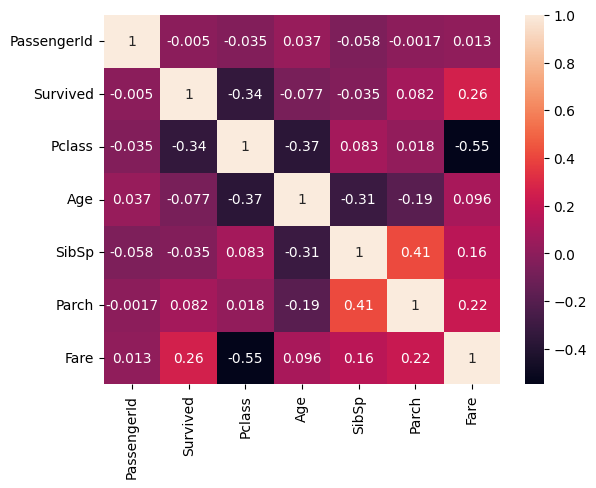

In [5]:
numeric_columns = data.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**Histplot for each feature :**

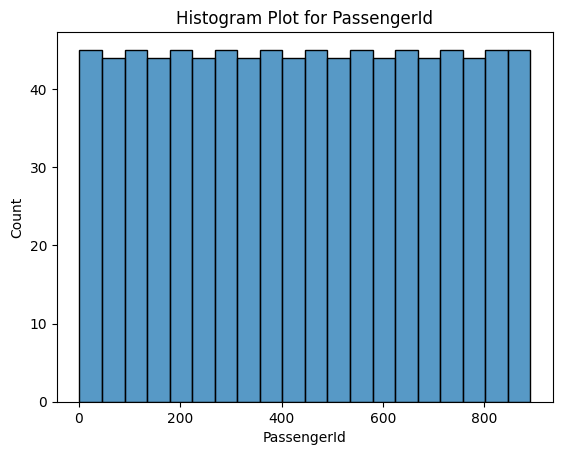

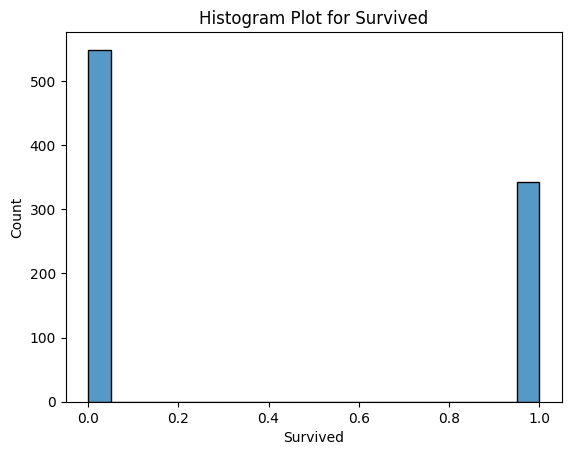

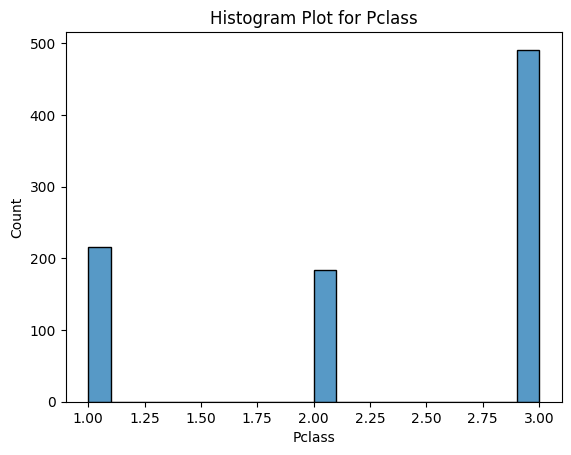

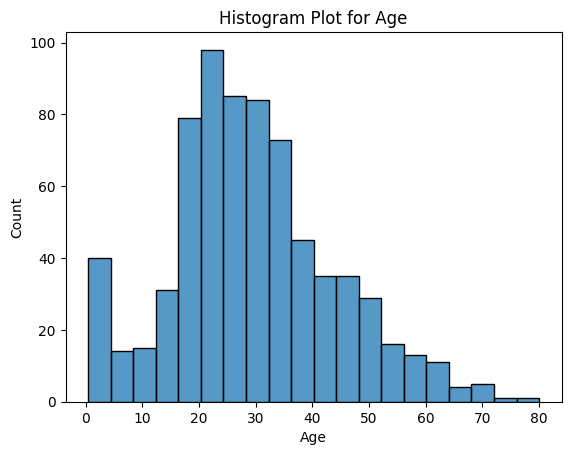

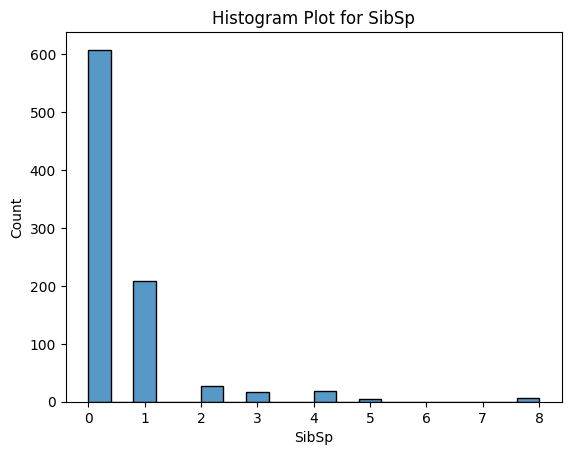

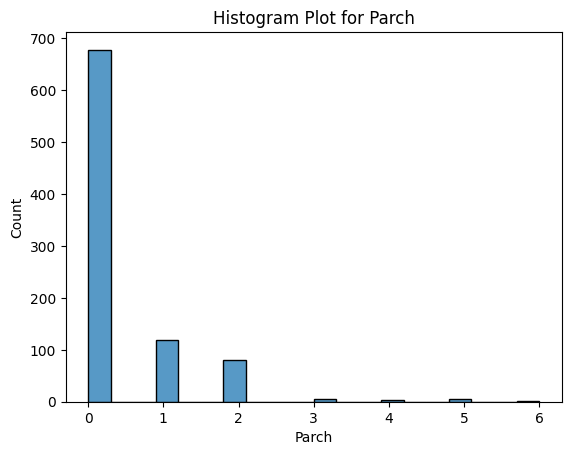

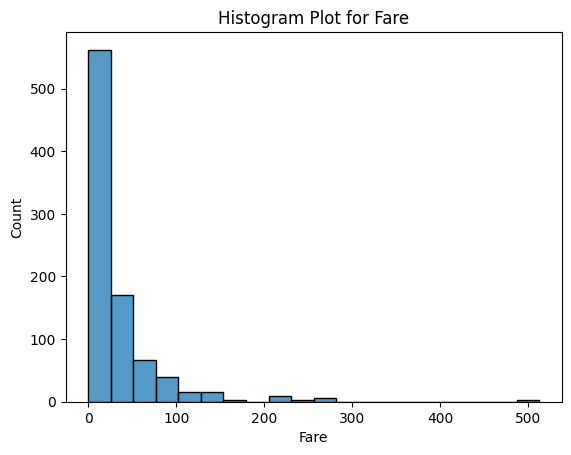

In [6]:
for col in numeric_columns.columns:
    sns.histplot(data[col], bins=20)
    plt.title(f'Histogram Plot for {col}')
    plt.show()

**Barplot for survival rate visualization :**

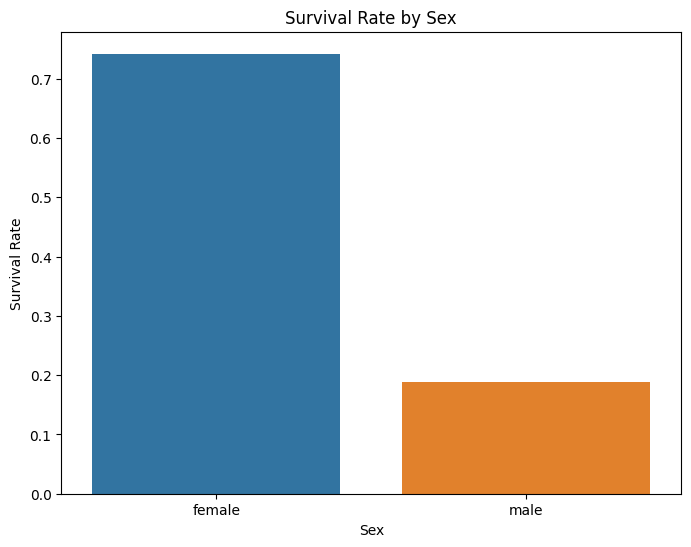

In [7]:
survival_rate_by_sex = data.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

#**Outlier Detection :**

In [8]:
numeric_columns = data.select_dtypes(include=['number'])
for col in numeric_columns.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

#**Splitting Dependent and Independent variables :**

In [9]:
X = data.drop('Survived', axis=1)
y = data['Survived']

#**Encoding :**

In [10]:
categorical_features = ['Sex', 'Pclass', 'Embarked']
for col in categorical_features:
  encoder = LabelEncoder()
  X[col] = encoder.fit_transform(X[col])

#**Feature Scaling :**

In [11]:
numeric_columns = X.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

#**Splitting Data into Train and Test :**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#**Conclusion :**

We have cleaned and prepared the Titanic dataset through Data Preprocessing so that we can analyze it more deeply and use it Further.

#**Thank You**